In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/DataMiningProject/202304.parquet")

In [ ]:
#df = pd.read_parquet(r'/Users/ironfeast/Desktop/project/data/202304.parquet')
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,None,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
1,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,None,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
2,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,None,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
3,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,None,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
4,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,None,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A


In [ ]:
df.shape
df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
df = df.loc[df.index[(df.Date_of_Transfer.dt.year>=2018)&(df.Date_of_Transfer.dt.year<=2022)]].copy()

In [ ]:
df.describe()

,price
count,2.827623e+07
mean,2.181305e+05
std,8.688525e+05
min,1.000000e+00
25%,8.495000e+04
50%,1.499500e+05
75%,2.475000e+05
max,5.943000e+08


In [ ]:
df.price.min()

1

In [ ]:
df.price.max()

569200000

In [ ]:
df.price.describe()

count    5.008416e+06
mean     3.720598e+05
std      1.653346e+06
min      1.000000e+00
25%      1.590000e+05
50%      2.500000e+05
75%      3.875000e+05
max      5.692000e+08
Name: price, dtype: float64

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,5008416.00
mean,372059.76
std,1653346.07
min,1.00
25%,159000.00
50%,250000.00
75%,387500.00
max,569200000.00


In [ ]:
df.price[round(df.price)==1].shape

(3,)

In [ ]:
df.drop(df.index[(round(df.price)==1)],inplace=True)#.price.describe()#.apply(lambda s: s.apply('{0:.2f}'.format))
df.shape

(5008413, 16)

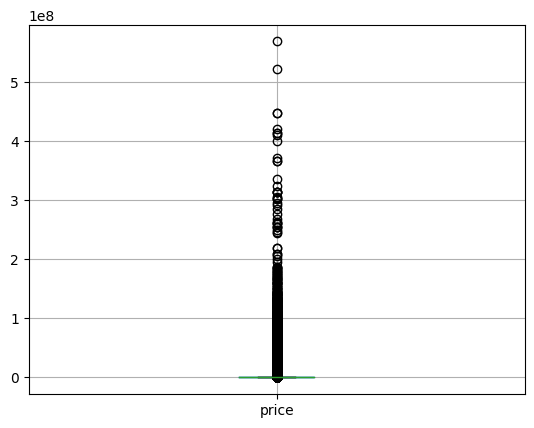

In [ ]:
# fig, axs = plt.subplots(1, 1)
# basic plot
df.boxplot(column='price')
plt.show()

# # notched plot
# axs[0, 1].boxplot(data, 1)
# axs[0, 1].set_title('notched plot')

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price
count,5008413.00
mean,372059.98
std,1653346.54
min,100.00
25%,159000.00
50%,250000.00
75%,387500.00
max,569200000.00


In [ ]:
df.Date_of_Transfer = pd.to_datetime(df.Date_of_Transfer)
df['year'] = df.Date_of_Transfer.dt.year
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year'],
      dtype='object')

<Axes: xlabel='year', ylabel='price'>

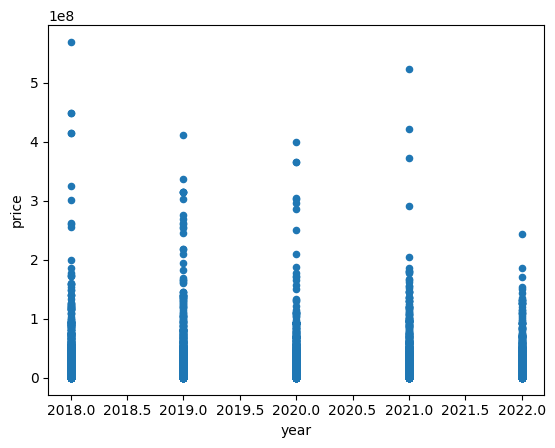

In [ ]:
df.plot(y = 'price',x='year',kind='scatter')

In [ ]:
df.price[round(df.price)<=1000].shape

(6128,)

In [ ]:
df.price[round(df.price)>=10000000].shape

(6158,)

In [ ]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].shape

(4978744,)

In [ ]:
df.price[((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

6114412.746536789

In [ ]:
df.price.mean()

372059.97857305297

In [ ]:
df.price[~((round(df.price)<=10000)|(round(df.price)>=10000000))].mean()

337840.5320072693

In [ ]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'})

,price
year,
2018,312574.391399
2019,314694.474624
2020,337685.943449
2021,355061.123900
2022,370824.366793


<Axes: xlabel='year'>

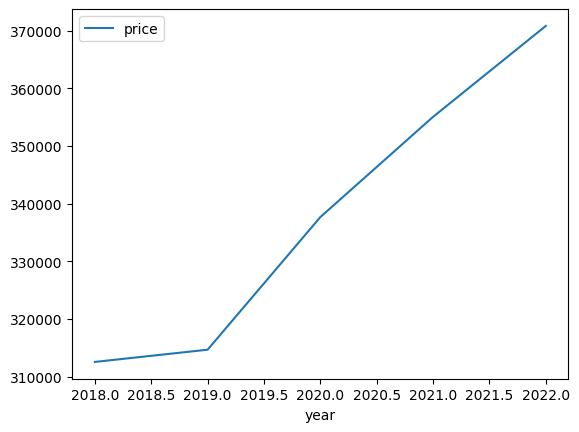

In [ ]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'mean'}).plot(kind='line')

In [ ]:
print(df[((round(df.price)>=5000)&(round(df.price)<80000))].shape) # Base low
print(df[((round(df.price)>=80000)&(round(df.price)<150000))].shape) # Low
print(df[((round(df.price)>=150000)&(round(df.price)<300000))].shape) # Moderate
print(df[((round(df.price)>=300000)&(round(df.price)<=10000000))].shape) # High

(255714, 17)
(840496, 17)
(1938425, 17)
(1954417, 17)


In [ ]:
print(6474632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))])) #
print(7688632/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(9092500/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))
print(4986399/len(df[~((round(df.price)<=5000)|(round(df.price)>=10000000))]))

1.2983967548463533
1.5418474498639965
1.823373512724811
0.9999524729697535


In [ ]:
df[~((round(df.price)<=10000)|(round(df.price)>=10000000))].groupby(['year']).agg({'price':'min'})

,price
year,
2018,10011
2019,10100
2020,10125
2021,10001
2022,10075


In [ ]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,T,N,F,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,S,N,F,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,F,N,L,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,T,N,F,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A,2018
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,D,N,F,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A,2018


In [ ]:
df.loc[df.index[((round(df.price)>=5000)&(round(df.price)<150000))],'Flag']= 'Low'
df.loc[df.index[((round(df.price)>=150000)&(round(df.price)<270000))],'Flag']= 'Medium' # Low
df.loc[df.index[((round(df.price)>=270000)&(round(df.price)<400000))],'Flag']= 'High' # Moderate
df.loc[df.index[((round(df.price)>=400000)&(round(df.price)<=10000000))],'Flag']= 'Very High' # High

In [ ]:
df.Flag.value_counts(dropna=False)

Medium       1617947
Very High    1182519
Low          1096210
High         1092376
NaN            19361
Name: Flag, dtype: int64

In [ ]:
df[df.Flag.isnull()].head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag
23139355,{7C2D0701-0493-4963-E053-6B04A8C07B97},17487152,2018-09-13,PL1 1UH,O,N,F,27 - 31,None,COBOURG STREET,None,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH,B,A,2018,NaN
23139365,{7C2D0701-049D-4963-E053-6B04A8C07B97},100,2018-11-22,TQ6 9BX,O,N,F,14,None,SOUTH TOWN,None,DARTMOUTH,SOUTH HAMS,DEVON,B,A,2018,NaN
23139785,{7C2D0701-0D24-4963-E053-6B04A8C07B97},1000,2018-11-05,SG6 3BE,O,N,L,58A,None,STATION ROAD,None,LETCHWORTH GARDEN CITY,NORTH HERTFORDSHIRE,HERTFORDSHIRE,B,A,2018,NaN
23139790,{7C2D0701-0D2A-4963-E053-6B04A8C07B97},650,2018-06-13,HP1 3JA,O,N,F,23,None,SLEETS END,None,HEMEL HEMPSTEAD,DACORUM,HERTFORDSHIRE,B,A,2018,NaN
23139803,{7C2D0701-0D3B-4963-E053-6B04A8C07B97},498,2018-06-08,AL9 5HW,O,N,F,11,None,GREENFIELD,None,HATFIELD,WELWYN HATFIELD,HERTFORDSHIRE,B,A,2018,NaN


In [ ]:
# print(df.shape)
# dfwithoutNaN = df.dropna(subset=['Flag'])
# print(dfwithoutNaN.shape)

In [ ]:
# print(dfwithoutNaN.Flag.value_counts(dropna=False))
# del dfwithoutNaN

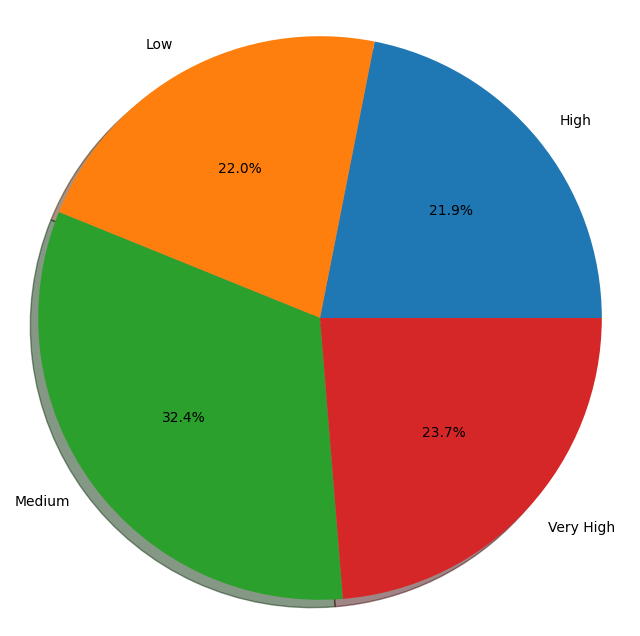

In [ ]:

labels = df['Flag'].astype('category').cat.categories. tolist()
counts = df['Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [ ]:
#from pandas_visual_analysis import VisualAnalysis
print(df.columns)
df.dtypes

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory_Type', 'Record_Status - monthly_file_only', 'year',
       'Flag'],
      dtype='object')


Transaction_unique_identifier                object
price                                         int64
Date_of_Transfer                     datetime64[ns]
postcode                                     object
Property_Type                                object
Old/New                                      object
Duration                                     object
PAON                                         object
SAON                                         object
Street                                       object
Locality                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory_Type                             object
Record_Status - monthly_file_only            object
year                                          int64
Flag                                         object
dtype: object

In [ ]:
df.nunique()

Transaction_unique_identifier        5008413
price                                 104360
Date_of_Transfer                        1826
postcode                             1068582
Property_Type                              5
Old/New                                    2
Duration                                   2
PAON                                  258705
SAON                                   32488
Street                                283819
Locality                               20743
Town/City                               1151
District                                 361
County                                   117
PPDCategory_Type                           2
Record_Status - monthly_file_only          1
year                                       5
Flag                                       4
dtype: int64

In [ ]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,T,N,F,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,S,N,F,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,F,N,L,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,T,N,F,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,D,N,F,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Medium


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Street_encoded'] = label_encoder.fit_transform(df['Street'])
df['Locality_encoded'] = label_encoder.fit_transform(df['Locality'])
df['Town/City_encoded'] = label_encoder.fit_transform(df['Town/City'])
df['District_encoded'] = label_encoder.fit_transform(df['District'])
df['County_encoded'] = label_encoder.fit_transform(df['County'])

In [ ]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,T,N,F,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,123937,18224,113,81,27
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,S,N,F,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,248941,19433,383,81,27
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,F,N,L,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,280447,12448,874,81,27
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,T,N,F,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Low,119427,20743,722,81,27
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,D,N,F,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,A,2018,Medium,18253,9693,927,81,27


In [ ]:
df = pd.get_dummies(df, columns=['Property_Type', 'Old/New', 'Duration', 'PPDCategory_Type'])

df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,PAON,SAON,Street,Locality,Town/City,District,County,Record_Status - monthly_file_only,year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,PPDCategory_Type_A,PPDCategory_Type_B
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,21,None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,123937,18224,113,81,27,0,0,0,0,1,1,0,1,0,1,0
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,4,None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,248941,19433,383,81,27,0,0,0,1,0,1,0,1,0,1,0
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,20B,None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,280447,12448,874,81,27,0,1,0,0,0,1,0,0,1,1,0
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,6,None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,119427,20743,722,81,27,0,0,0,0,1,1,0,1,0,1,0
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,25,None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,2018,Medium,18253,9693,927,81,27,1,0,0,0,0,1,0,1,0,1,0


In [ ]:
df.PAON.unique()[:]

array(['21', '4', '20B', ..., 'WYCHWOOD, 1', '7 JOHNNY BARN COTTAGES',
       'PIPERS WOOD'], dtype=object)

In [ ]:
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City',
       'District', 'County', 'Record_Status - monthly_file_only', 'year',
       'Flag', 'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded', 'Property_Type_D',
       'Property_Type_F', 'Property_Type_O', 'Property_Type_S',
       'Property_Type_T', 'Old/New_N', 'Old/New_Y', 'Duration_F', 'Duration_L',
       'PPDCategory_Type_A', 'PPDCategory_Type_B'],
      dtype='object')

In [ ]:
df.dtypes

Transaction_unique_identifier                object
price                                         int64
Date_of_Transfer                     datetime64[ns]
postcode                                     object
PAON                                         object
SAON                                         object
Street                                       object
Locality                                     object
Town/City                                    object
District                                     object
County                                       object
Record_Status - monthly_file_only            object
year                                          int64
Flag                                         object
Street_encoded                                int64
Locality_encoded                              int64
Town/City_encoded                             int64
District_encoded                              int64
County_encoded                                int64
Property_Typ

In [ ]:
df['Record_Status - monthly_file_only'].unique()

array(['A'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['PAON'] = df['PAON'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)
df['SAON'] = df['SAON'].apply(lambda x: label_encoder.fit_transform([x]) if isinstance(x, str) else x)

In [ ]:
df.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,PAON,SAON,Street,Locality,Town/City,District,County,Record_Status - monthly_file_only,year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,PPDCategory_Type_A,PPDCategory_Type_B
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},75000,2018-06-20,DL13 4BA,[0],None,HIGHFIELDS,TOW LAW,BISHOP AUCKLAND,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,123937,18224,113,81,27,0,0,0,0,1,1,0,1,0,1,0
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},115000,2018-07-13,DL17 9LB,[0],None,THE LANE,WEST CORNFORTH,FERRYHILL,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,248941,19433,383,81,27,0,0,0,1,0,1,0,1,0,1,0
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},24000,2018-04-10,SR7 9AG,[0],None,WOODS TERRACE,MURTON,SEAHAM,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,280447,12448,874,81,27,0,1,0,0,0,1,0,0,1,1,0
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},56000,2018-06-22,DL5 5PS,[0],None,HEILD CLOSE,None,NEWTON AYCLIFFE,COUNTY DURHAM,COUNTY DURHAM,A,2018,Low,119427,20743,722,81,27,0,0,0,0,1,1,0,1,0,1,0
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},220000,2018-05-25,DL16 7HE,[0],None,BECKWITH CLOSE,KIRK MERRINGTON,SPENNYMOOR,COUNTY DURHAM,COUNTY DURHAM,A,2018,Medium,18253,9693,927,81,27,1,0,0,0,0,1,0,1,0,1,0


In [ ]:
# Transaction_unique_identifier                object --> Not required for modelling
# price                                         int64 --> Price is not required as we are trying to predict the category without knowing the actual price
# Date_of_Transfer                     datetime64[ns] --> Year is required
# postcode                                     object --> post code is also required
# PAON                                         object --> Primary Addressable Object Name, as of now checking on this if this is required for modelling
# SAON                                         object --> Secondary Addressable Object Name seems to be not required but will check with this.
# Street                                       object --> Street is required as it may have some waitage.
# Locality                                     object --> May be this is a required column
# Town/City                                    object --> This is required columns
# District                                     object --> This is also a required field
# County                                       object --> required
# Record_Status - monthly_file_only            object --> It has only one value which would not give any information.
# year                                          int64 --> Derived from Date of transfer
# Flag                                         object --> Derived from Price field.
# Street_encoded                                int64 --> R
# Locality_encoded                              int64 --> R as of now
# Town/City_encoded                             int64 --> R
# District_encoded                              int64 --> R
# County_encoded                                int64 --> R
# Property_Type_D                               uint8 --> R
# Property_Type_F                               uint8 --> R
# Property_Type_O                               uint8 --> R
# Property_Type_S                               uint8 --> R
# Property_Type_T                               uint8 --> R
# Old/New_N                                     uint8 --> R
# Old/New_Y                                     uint8 --> R
# Duration_F                                    uint8 --> R
# Duration_L                                    uint8 --> R
# Duration_U                                    uint8 --> R
# PPDCategory_Type_A                            uint8 --> R
# PPDCategory_Type_B                            uint8 --> R

## we are going to take the columns [year,Flag,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,
##                                   County_encoded,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,
##                                   Property_Type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,
##                                   PPDCategory_Type_A,PPDCategory_Type_B]



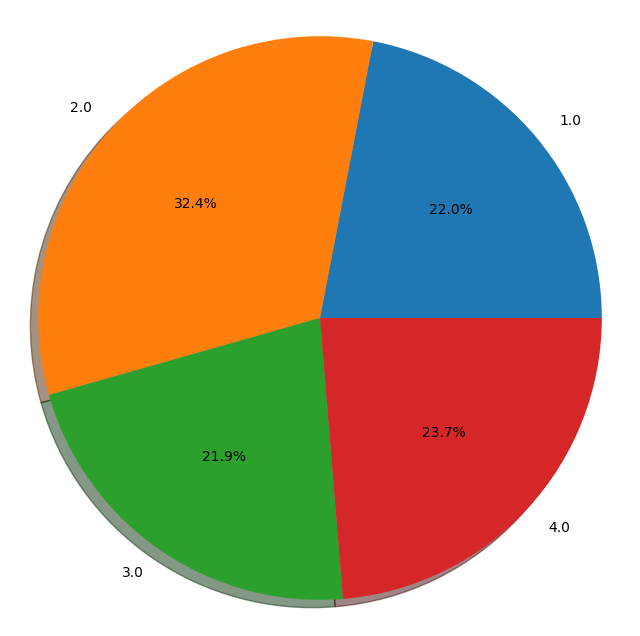

In [ ]:
# manual ordinal encoding the target variable
df.loc[df.index[(df.Flag=='Low')],'Target_Flag']= 1
df.loc[df.index[(df.Flag=='Medium')],'Target_Flag']= 2
df.loc[df.index[(df.Flag=='High')],'Target_Flag']= 3
df.loc[df.index[(df.Flag=='Very High')],'Target_Flag']= 4

labels = df['Target_Flag'].astype('category').cat.categories. tolist()
counts = df['Target_Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [ ]:
df.columns

Index(['Transaction_unique_identifier', 'price', 'Date_of_Transfer',
       'postcode', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City',
       'District', 'County', 'Record_Status - monthly_file_only', 'year',
       'Flag', 'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded', 'Property_Type_D',
       'Property_Type_F', 'Property_Type_O', 'Property_Type_S',
       'Property_Type_T', 'Old/New_N', 'Old/New_Y', 'Duration_F', 'Duration_L',
       'PPDCategory_Type_A', 'PPDCategory_Type_B', 'Target_Flag'],
      dtype='object')

In [ ]:
df1 = df.loc[df.index[(df.year>=2018)]][['Transaction_unique_identifier', 'year',
       'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded', 'Property_Type_D',
       'Property_Type_F', 'Property_Type_O', 'Property_Type_S',
       'Property_Type_T', 'Old/New_N', 'Old/New_Y', 'Duration_F', 'Duration_L', 'PPDCategory_Type_A', 'PPDCategory_Type_B',
       'Target_Flag']].copy()

del df

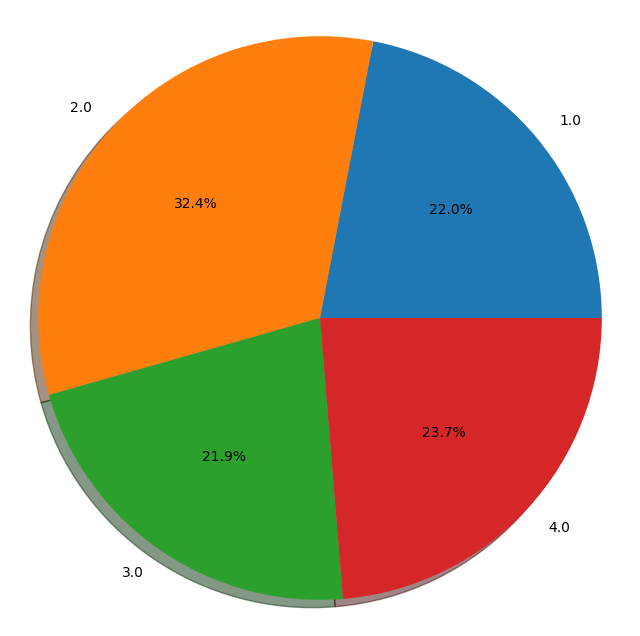

In [ ]:
labels = df1['Target_Flag'].astype('category').cat.categories. tolist()
counts = df1['Target_Flag'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
figi, ax1 = plt. subplots (figsize = (8,8))
ax1. pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1. axis ('equal')
plt. show()

In [ ]:
df1.head()

,Transaction_unique_identifier,year,Street_encoded,Locality_encoded,Town/City_encoded,District_encoded,County_encoded,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,PPDCategory_Type_A,PPDCategory_Type_B,Target_Flag
23138908,{726BF13A-993E-0A46-E053-6C04A8C01D0D},2018,123937,18224,113,81,27,0,0,0,0,1,1,0,1,0,1,0,1.0
23138909,{726BF13A-993F-0A46-E053-6C04A8C01D0D},2018,248941,19433,383,81,27,0,0,0,1,0,1,0,1,0,1,0,1.0
23138910,{726BF13A-9940-0A46-E053-6C04A8C01D0D},2018,280447,12448,874,81,27,0,1,0,0,0,1,0,0,1,1,0,1.0
23138911,{726BF13A-9941-0A46-E053-6C04A8C01D0D},2018,119427,20743,722,81,27,0,0,0,0,1,1,0,1,0,1,0,1.0
23138912,{726BF13A-9942-0A46-E053-6C04A8C01D0D},2018,18253,9693,927,81,27,1,0,0,0,0,1,0,1,0,1,0,2.0


In [ ]:
df1.dtypes

Transaction_unique_identifier     object
year                               int64
Street_encoded                     int64
Locality_encoded                   int64
Town/City_encoded                  int64
District_encoded                   int64
County_encoded                     int64
Property_Type_D                    uint8
Property_Type_F                    uint8
Property_Type_O                    uint8
Property_Type_S                    uint8
Property_Type_T                    uint8
Old/New_N                          uint8
Old/New_Y                          uint8
Duration_F                         uint8
Duration_L                         uint8
PPDCategory_Type_A                 uint8
PPDCategory_Type_B                 uint8
Target_Flag                      float64
dtype: object

In [ ]:
print(len(df1))
print(df1.Transaction_unique_identifier.nunique())

5008413
5008413


In [ ]:
df1.year.value_counts(dropna=False)

2021    1220165
2018    1035342
2019    1007770
2020     882716
2022     862420
Name: year, dtype: int64

In [ ]:
df1.isnull().sum()

Transaction_unique_identifier        0
year                                 0
Street_encoded                       0
Locality_encoded                     0
Town/City_encoded                    0
District_encoded                     0
County_encoded                       0
Property_Type_D                      0
Property_Type_F                      0
Property_Type_O                      0
Property_Type_S                      0
Property_Type_T                      0
Old/New_N                            0
Old/New_Y                            0
Duration_F                           0
Duration_L                           0
PPDCategory_Type_A                   0
PPDCategory_Type_B                   0
Target_Flag                      19361
dtype: int64

In [ ]:
#print(df[df1.Target_Flag.isnull()].price.max())
#print(df[df1.Target_Flag.isnull()].price.min())

In [ ]:
print(df1.shape)
df1.drop(df1.index[(df1.Target_Flag.isnull())],inplace=True)
print(df1.shape)

(5008413, 19)
(4989052, 19)


In [ ]:
print(df1.Transaction_unique_identifier.nunique())


4989052


In [ ]:
df1.Target_Flag.value_counts(dropna=False)

2.0    1617947
4.0    1182519
1.0    1096210
3.0    1092376
Name: Target_Flag, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df1[['year',
       'Street_encoded', 'Locality_encoded', 'Town/City_encoded',
       'District_encoded', 'County_encoded', 'Property_Type_D',
       'Property_Type_F', 'Property_Type_O', 'Property_Type_S',
       'Property_Type_T', 'Old/New_N', 'Old/New_Y', 'Duration_F', 'Duration_L',
       'PPDCategory_Type_A', 'PPDCategory_Type_B']]

Y = df1['Target_Flag']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=121)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000,criterion='gini',n_jobs=-1,oob_score=True)

clf.fit(X_train,Y_train)

x_prediction = clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print('Accuracy : ', metrics.accuracy_score(Y_test,x_prediction))

In [ ]:
# # Split dataset into training set and test set
# N_train, N_test, m_train, m_test = train_test_split(N, m, test_size=0.20, random_state=111) # 70% training and 30% test
# #Import Random Forest Model from sklearn. ensemble import RandomForestClassifier
# #Create a Gaussian Classifier
# c1f2=RandomForestClassifier（n_estimatons=1321, criterion= gina'，n_jobs=-2, oob_score=True）
# #Train the model using the training sets y_pred=clf.predict(X_test)
# c1f2. fit (N_train,m_train)
# m_pred2=c1f2. predict (N_test)
# print ("Accuracy:", metrics. accuracy_score(m_test, m_pred2))

# feature
# imp2 = pd.Series (clf2.feature_importances, index=N. columns). sort_values (ascending=False)
# print (feature_imp2)
# sns. set(rc={figure. figsize: (8,8)})
# # Creating a bar plot
# sns. barplot (x=feature_imp2, y=feature _imp2. index)
# # Add Labels to your graph
# plt.xlabel (Feature Importance Score')
# pIt. ylabel (Features')
# plt. title("Visualizing Important Features")
# plt. legend ()
# pIt. show()
# I

# print（"=== Confusion Matrix ==="）
# print pd. Data Frame-Fusion matrix m test, dered write-off 1,
# index=['Actual paid', 'Actual write-off']))
# print ('\n')

# print（"=== Classification Report ＝=="）
# print (classification_report (m_test, m_pred2))
# dump (c1f2,dir2+' /RandomForestClassifier_APC'+str(oSYear)+'wo-Ranking.joblib')
# dump (replace_map_comp2, dir3+' /replace_map_comp2_payername. joblib') dump (replace_map_comp3, dir3+' /replace_map_comp3_providername joblib) dump (replace_map_comp5,dir3+' /replace_map_comp5_CPT_Concat.joblib')